In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\afroz\OneDrive\Documents\New folder\quantium\QVI_purchase_behaviour.csv")

In [3]:
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [5]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [6]:
lifestage_counts = df['LIFESTAGE'].value_counts()
print(lifestage_counts)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


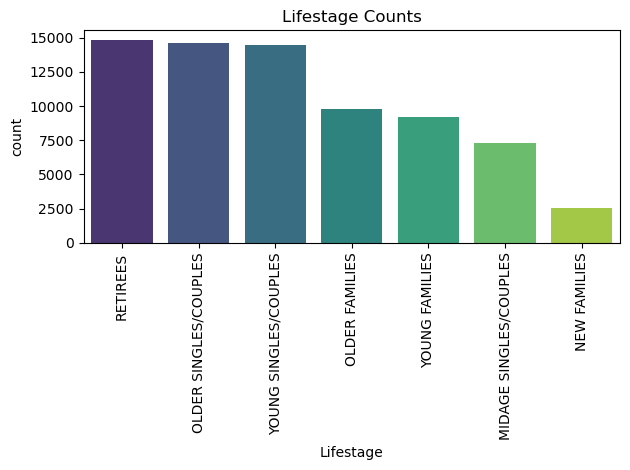

In [7]:
plt.figsize=(12,6)
sns.barplot(x = lifestage_counts.index, y = lifestage_counts.values, palette = 'viridis')

plt.xlabel('Lifestage')
plt.ylabel('count')
plt.title('Lifestage Counts')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [8]:
customer_counts = df['PREMIUM_CUSTOMER'].value_counts()

In [9]:
print(customer_counts)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


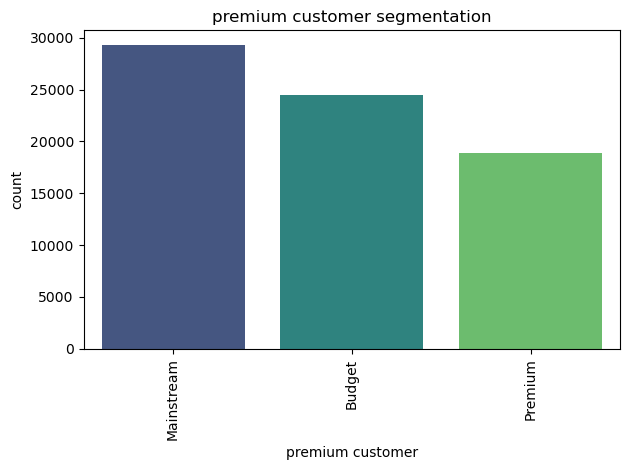

In [10]:
plt.figsize = (20,6)
sns.barplot(x = customer_counts.index, y = customer_counts.values, palette = 'viridis')

plt.xlabel('premium customer')
plt.ylabel('count')
plt.title('premium customer segmentation')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [11]:
lifestage_premium_customer = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().reset_index(name = 'count')
print(lifestage_premium_customer)

                 LIFESTAGE PREMIUM_CUSTOMER  count
0   MIDAGE SINGLES/COUPLES           Budget   1504
1   MIDAGE SINGLES/COUPLES       Mainstream   3340
2   MIDAGE SINGLES/COUPLES          Premium   2431
3             NEW FAMILIES           Budget   1112
4             NEW FAMILIES       Mainstream    849
5             NEW FAMILIES          Premium    588
6           OLDER FAMILIES           Budget   4675
7           OLDER FAMILIES       Mainstream   2831
8           OLDER FAMILIES          Premium   2274
9    OLDER SINGLES/COUPLES           Budget   4929
10   OLDER SINGLES/COUPLES       Mainstream   4930
11   OLDER SINGLES/COUPLES          Premium   4750
12                RETIREES           Budget   4454
13                RETIREES       Mainstream   6479
14                RETIREES          Premium   3872
15          YOUNG FAMILIES           Budget   4017
16          YOUNG FAMILIES       Mainstream   2728
17          YOUNG FAMILIES          Premium   2433
18   YOUNG SINGLES/COUPLES     

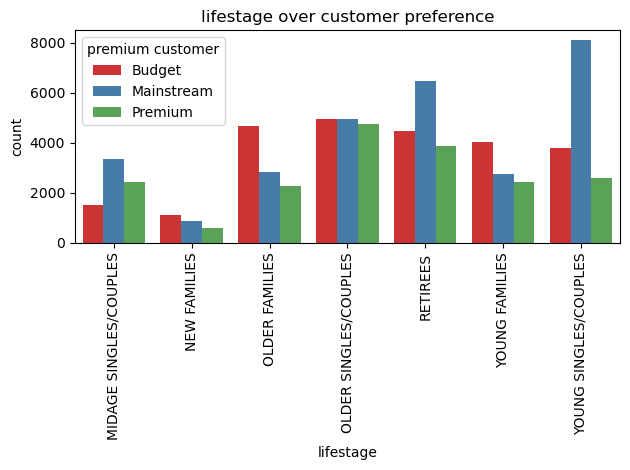

In [12]:
plt.figsize=(20,6)

sns.barplot(x = 'LIFESTAGE', y = 'count', hue = 'PREMIUM_CUSTOMER', data =lifestage_premium_customer, palette = 'Set1')
plt.xlabel('lifestage')
plt.ylabel('count')
plt.title('lifestage over customer preference')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.legend(title='premium customer', loc = 'upper left')
plt.show()

In [51]:
data = pd.read_excel(r"C:\Users\afroz\OneDrive\Documents\New folder\quantium\QVI_transaction_data.xlsx")

In [52]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,brand,PROD_NAME,flavour,wgt,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,NCC,Natural Chip Compny SeaSalt175g,sea salt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese 175g,Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken 170g,Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly S/Cream&Onion 175g,S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Hny&Jlpno Chili,150,3,13.8


In [19]:
data['PROD_NAME'] = data['PROD_NAME'].str[:-4]

In [20]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,brand,PROD_NAME,flavour,Weight,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,NCC,Natural Chip Compny SeaSalt,sea salt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly S/Cream&Onion,S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili,Hny&Jlpno Chili,150,3,13.8


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   brand           264836 non-null  object        
 6   PROD_NAME       264836 non-null  object        
 7   flavour         264836 non-null  object        
 8   Weight          264836 non-null  int64         
 9   PROD_QTY        264836 non-null  int64         
 10  TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [23]:
data['brand'].value_counts()

Kettle               41288
Smiths               31823
Doritos              28147
Pringles             25102
RRD                  17779
Woolworths           14757
Infuzions            14201
Thins                14075
Cobs                  9693
Tostitos              9471
Twisties              9454
Old El Paso Salsa     9324
GrnWves               7740
NCC                   7469
Tyrrells              6442
Cheezels              4603
CCs                   4551
Sunbites              3008
Cheetos               2927
Burger                1564
French fries          1418
Name: brand, dtype: int64

In [24]:
data['flavour'].value_counts()

Salt/Vinegr            18487
Original               12353
Sour cream & chives     7683
cheese supreme          6269
Lightly Salted          6248
                       ...  
French OnionDip         1438
Chikn&Garlic Aioli      1434
Frch/Onin               1432
Sea Salt                1431
potato chips            1418
Name: flavour, Length: 85, dtype: int64

In [26]:
popular_flavour = data['flavour'].mode().iloc[0]
print(popular_flavour)

Salt/Vinegr


In [35]:
brand_sales = data.groupby('brand')['TOT_SALES'].sum()
print(brand_sales)

brand
Burger                 6831.0
CCs                   18078.9
Cheetos               16884.5
Cheezels              40029.9
Cobs                  70569.8
Doritos              241890.9
French fries           7929.0
GrnWves               51617.2
Infuzions             99047.6
Kettle               390239.8
NCC                   42318.0
Old El Paso Salsa     90785.1
Pringles             177655.5
RRD                   95046.0
Smiths               224660.2
Sunbites               9676.4
Thins                 88852.5
Tostitos              79789.6
Twisties              81522.1
Tyrrells              51647.4
Woolworths            49343.6
Name: TOT_SALES, dtype: float64


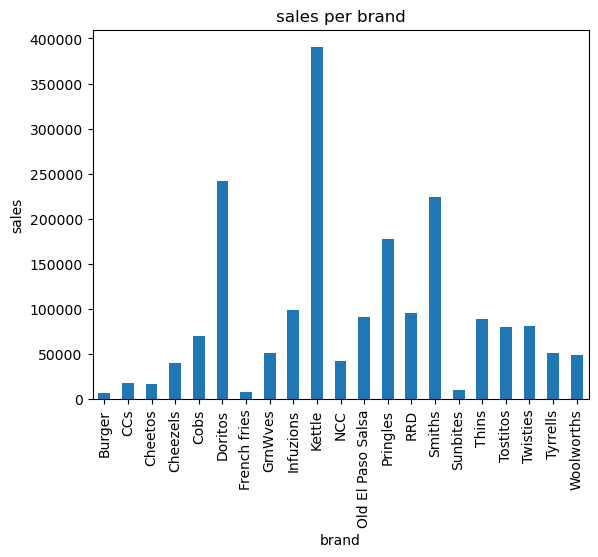

In [36]:
brand_sales.plot(kind = 'bar')
plt.xlabel('brand')
plt.ylabel('sales')
plt.title('sales per brand')
plt.xticks(rotation = 90)
plt.show()

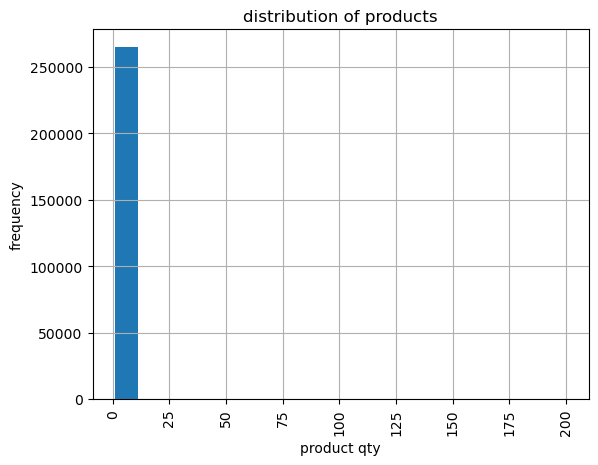

In [37]:
data['PROD_QTY'].hist(bins = 20)
plt.xlabel('product qty')
plt.ylabel('frequency')
plt.title('distribution of products')
plt.xticks(rotation = 90)
plt.show()

In [40]:
data['STORE_NBR'].value_counts()

226    2022
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
252       2
206       2
92        1
76        1
Name: STORE_NBR, Length: 272, dtype: int64

In [42]:
avg_qty_per_transaction=data.groupby('TXN_ID')['PROD_QTY'].mean()
print(avg_qty_per_transaction)
tot_sal_per_transaction = data.groupby('TXN_ID')['TOT_SALES'].sum()
print(tot_sal_per_transaction)

TXN_ID
1          2.0
2          1.0
3          1.0
4          1.0
5          1.0
          ... 
270206     2.0
270207     2.0
270208     2.0
270209     2.0
2415841    2.0
Name: PROD_QTY, Length: 263127, dtype: float64
TXN_ID
1           6.0
2           2.7
3           3.6
4           3.0
5           1.9
           ... 
270206      8.4
270207      7.6
270208      7.4
270209      6.6
2415841    10.8
Name: TOT_SALES, Length: 263127, dtype: float64


In [43]:
avg_qty_per_transaction.describe()

count    263127.000000
mean          1.907011
std           0.645289
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [44]:
tot_sal_per_transaction.describe()

count    263127.000000
mean          7.351640
std           3.150629
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64

In [48]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,brand,PROD_NAME,flavour,Weight,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,NCC,Natural Chip Compny SeaSalt,sea salt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly S/Cream&Onion,S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili,Hny&Jlpno Chili,150,3,13.8


In [54]:
data['wgt'].mode().iloc[0]

175

In [59]:
product_name = data['PROD_NAME']
all_words = []

for name in product_name:
    words = name.split()
    all_words.extend(words)

word_series = pd.Series(all_words)
word_counts = word_series.value_counts()

print(word_counts.head(25))

175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
Smiths      28860
Salt        27976
Cheese      27890
Pringles    25102
134g        25102
Doritos     24962
Crinkle     23960
110g        22387
Corn        22063
Original    21560
Cut         20754
Chip        18645
170g        18502
Salsa       18094
Chicken     15407
165g        15297
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
dtype: int64


In [66]:
def remove_special_characters(text):
    import re
    return re.sub(r'[^A-Za-z0-9\s]+', '',text)

data['PROD_NAME'] = data['PROD_NAME'].apply(remove_special_characters)

In [67]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,brand,PROD_NAME,flavour,wgt,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,NCC,Natural Chip Compny SeaSalt175g,sea salt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese 175g,Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken 170g,Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly SCreamOnion 175g,S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHnyJlpno Chili 150g,Hny&Jlpno Chili,150,3,13.8


In [76]:
data['PROD_NAME'] = data['PROD_NAME'].str[:-4]
data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,brand,PROD_NAME,flavour,wgt,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,NCC,Natural Chip Compny,sea salt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Ch,Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips,Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly SCre,S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHnyJlpn,Hny&Jlpno Chili,150,3,13.8


In [72]:
fil_data = data[~data['PROD_NAME'].str.contains('Salsa', case=False)]
fil_data.head() 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,brand,PROD_NAME,flavour,wgt,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,NCC,Natural Chip Compny SeaSalt,sea salt,175,2,6.0
1,2019-05-14,1,1307,348,66,CCs,CCs Nacho Cheese,Nacho Cheese,175,3,6.3
2,2019-05-20,1,1343,383,61,Smiths,Smiths Crinkle Cut Chips Chicken,Chicken,170,2,2.9
3,2018-08-17,2,2373,974,69,Smiths,Smiths Chip Thinly SCreamOnion,S/Cream&Onion,175,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle,Kettle Tortilla ChpsHnyJlpno Chili,Hny&Jlpno Chili,150,3,13.8


In [105]:
excel_file_path = r'C:\Users\afroz\OneDrive\Documents\New folder\quantium\tran_mod.xlsx'
fil_data.to_excel(excel_file_path, index = False)
print(f"data saved to '{excel_file_path}'")

data saved to 'C:\Users\afroz\OneDrive\Documents\New folder\quantium\tran_mod.xlsx'


In [74]:
fil_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,wgt,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,175.585178,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,59.434727,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,70.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,150.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,170.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,175.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,380.000000,200.000000,650.000000


In [79]:
total_sales = fil_data.groupby('STORE_NBR')['TOT_SALES'].sum()
print(total_sales)

STORE_NBR
1       2223.90
2       1854.00
3      12149.65
4      13709.25
5       8802.20
         ...   
268     2421.85
269    10470.70
270    10519.05
271     8952.30
272     4398.95
Name: TOT_SALES, Length: 271, dtype: float64


In [82]:
total_transactions = fil_data.groupby('STORE_NBR')['TXN_ID'].sum()
print(total_transactions)

STORE_NBR
1         160528
2         392514
3        2684049
4        5536329
5        6340556
         ...    
268    134190822
269    397058235
270    401360664
271    340463991
272    144946780
Name: TXN_ID, Length: 271, dtype: int64


In [95]:
daily_sales = fil_data.groupby('DATE')['TOT_SALES'].sum()
print(daily_sales)

DATE
2018-07-01    4920.1
2018-07-02    4877.0
2018-07-03    4954.7
2018-07-04    4968.1
2018-07-05    4682.0
               ...  
2019-06-26    4829.7
2019-06-27    4941.3
2019-06-28    4876.6
2019-06-29    5177.6
2019-06-30    5108.4
Name: TOT_SALES, Length: 364, dtype: float64


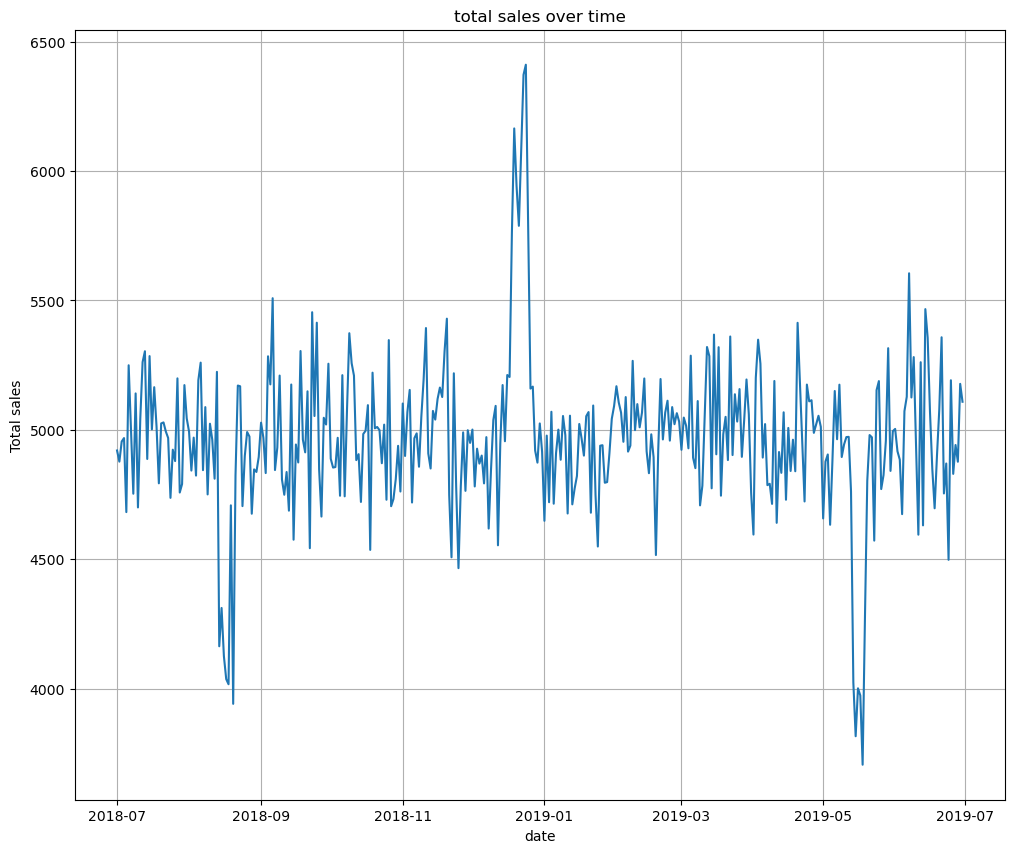

In [88]:
plt.figure(figsize = (12,10))
plt.plot(daily_sales.index,daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('total sales over time')
plt.grid(True)
plt.show()
           

In [98]:
daily_transactions = fil_data.groupby('DATE')['TXN_ID'].count()
daily_transactions.describe()

count    364.000000
mean     677.862637
std       33.689358
min      607.000000
25%      658.000000
50%      674.000000
75%      694.250000
max      865.000000
Name: TXN_ID, dtype: float64

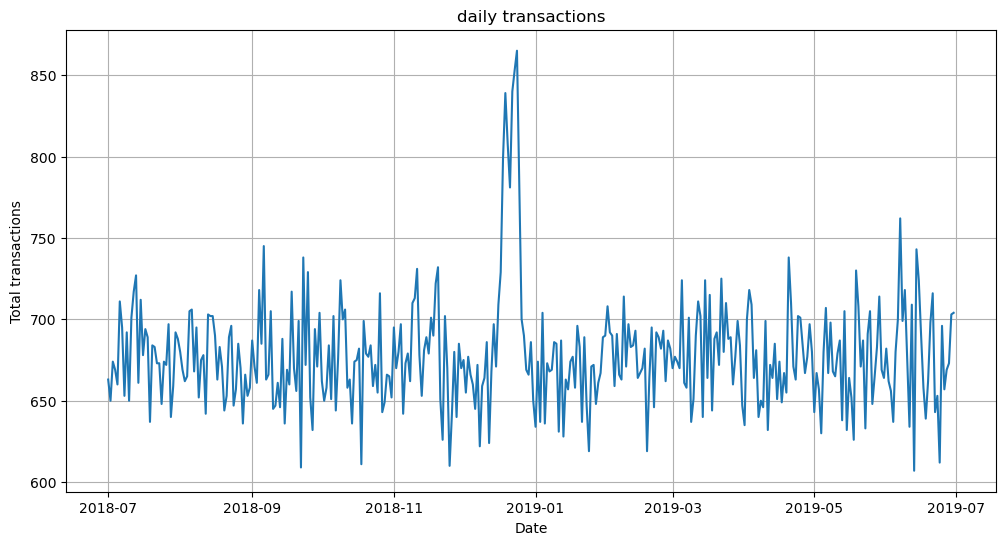

In [90]:
plt.figure(figsize = (12,6))
plt.plot(daily_transactions.index, daily_transactions.values)
plt.xlabel('Date')
plt.ylabel('Total transactions')
plt.title('daily transactions')
plt.grid(True)
plt.show()

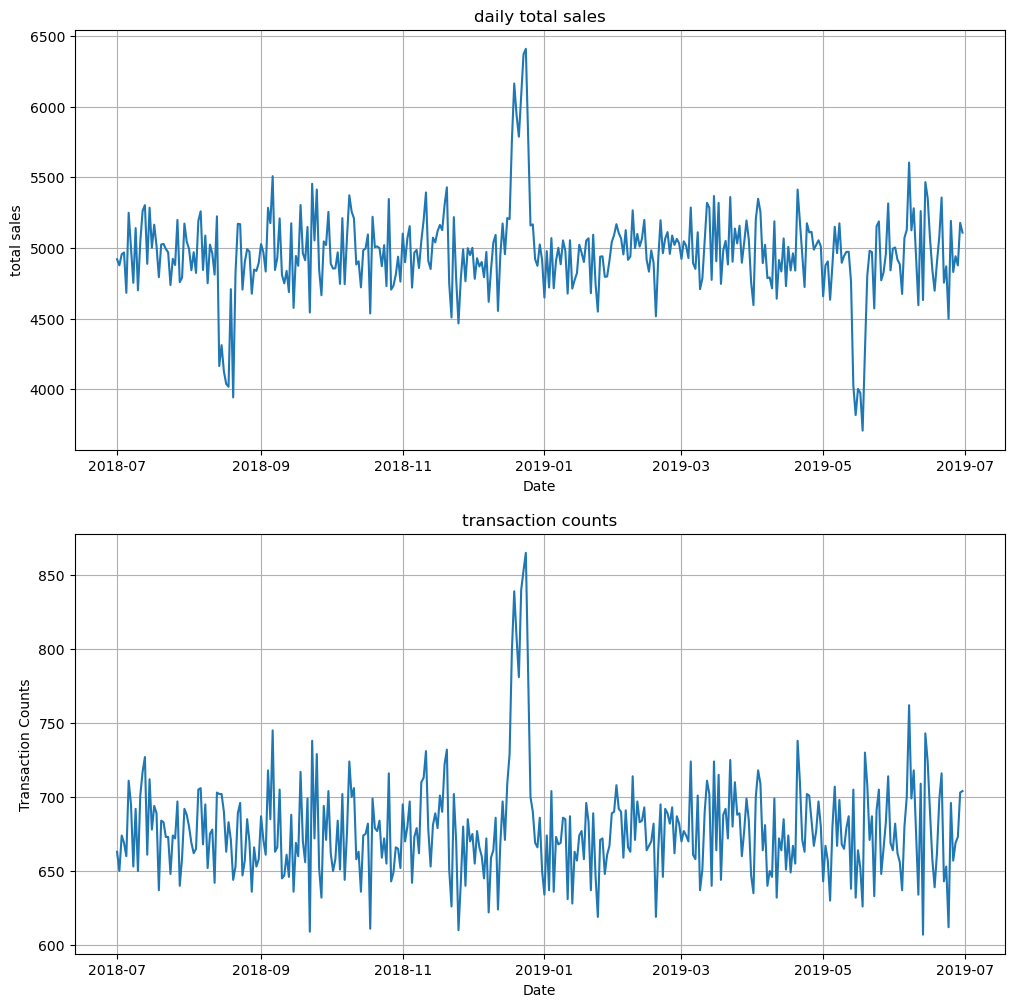

In [94]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,12))
ax1.plot(daily_sales.index,daily_sales.values)
ax1.set_xlabel('Date')
ax1.set_ylabel('total sales')
ax1.set_title('daily total sales')
ax1.grid(True)

ax2.plot(daily_transactions.index,daily_transactions.values)
ax2.set_xlabel('Date')
ax2.set_ylabel('Transaction Counts')
ax2.set_title('transaction counts')
ax2.grid(True)

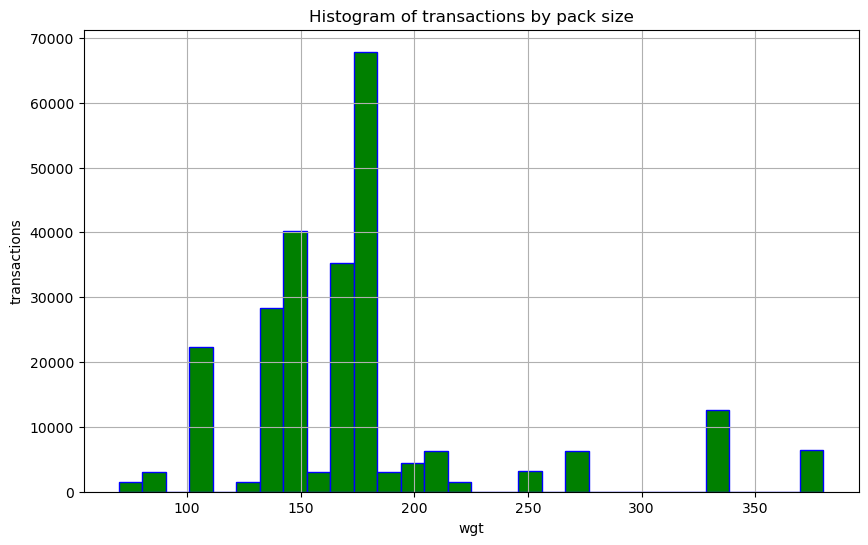

In [103]:
plt.figure(figsize = (10,6))
plt.hist(fil_data['wgt'],bins = 30, color='green',edgecolor = 'blue')
plt.xlabel('wgt')
plt.ylabel('transactions')
plt.title('Histogram of transactions by pack size')
plt.grid(True)
plt.show()

In [110]:
a= pd.read_csv(r"C:\Users\afroz\OneDrive\Documents\New folder\quantium\QVI_purchase_behaviour.csv")
a.to_excel(r"C:\Users\afroz\OneDrive\Documents\New folder\quantium\purchase_behaviour.xlsx", index = False)


In [112]:
df1 = pd.read_excel(r"C:\Users\afroz\OneDrive\Documents\New folder\quantium\purchase_behaviour.xlsx")
df2 = pd.read_excel(r"C:\Users\afroz\OneDrive\Documents\New folder\quantium\tran_mod.xlsx")
mdf = pd.merge(df1, df2, on='LYLTY_CARD_NBR', how = 'left')
mdf.to_excel(r'C:\Users\afroz\OneDrive\Documents\New folder\quantium\merged.xlsx', index = False)

In [113]:
mdf.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,brand,PROD_NAME,flavour,wgt,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1.0,1.0,5.0,NCC,Natural Chip Compny SeaSalt,sea salt,175.0,2.0,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.0,2.0,58.0,RRD,Red Rock Deli ChiknGarlic Aioli,Chikn&Garlic Aioli,150.0,1.0,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1.0,3.0,52.0,GrnWves,Grain Waves Sour CreamChives,Sour cream & chives,210.0,1.0,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1.0,4.0,106.0,NCC,Natural ChipCo Hony Soy Chckn,Honey Soy Chicken,175.0,1.0,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1.0,5.0,96.0,Woolworths,WW Original Stacked Chips,Original Stacked,160.0,1.0,1.9


In [114]:
average_pdt_qty = mdf.groupby('LIFESTAGE')['PROD_QTY'].mean()
print(average_pdt_qty)

LIFESTAGE
MIDAGE SINGLES/COUPLES    1.901701
NEW FAMILIES              1.857781
OLDER FAMILIES            1.955182
OLDER SINGLES/COUPLES     1.913354
RETIREES                  1.892593
YOUNG FAMILIES            1.940460
YOUNG SINGLES/COUPLES     1.834025
Name: PROD_QTY, dtype: float64


In [115]:
average_sales = mdf.groupby('LIFESTAGE')['TOT_SALES'].mean()
print(average_sales)

LIFESTAGE
MIDAGE SINGLES/COUPLES    7.373442
NEW FAMILIES              7.287664
OLDER FAMILIES            7.303364
OLDER SINGLES/COUPLES     7.402982
RETIREES                  7.373994
YOUNG FAMILIES            7.275841
YOUNG SINGLES/COUPLES     7.175854
Name: TOT_SALES, dtype: float64


In [119]:
from scipy import stats

mainstream = mdf[mdf['PREMIUM_CUSTOMER'] == 'MAINSTREAM']['PROD_QTY']
premium_budget_midage = mdf[mdf['LIFESTAGE'].isin(['Premium','Budget','MIDAGE SINGLES/COUPLES'])]['PROD_QTY']

t_stat,p_value = stats.ttest_ind(mainstream, premium_budget_midage, equal_var = False)
print("independent T-Test Results:")
print(f"T-statistics:{t_stat}")
print(f"p-value:{p_value}")

alpha =0.05
if p_value < alpha:
    print('the difference is statistically significant')
else:
    print("the difference is statistically insignificant")

independent T-Test Results:
T-statistics:nan
p-value:nan
the difference is statistically insignificant
